# TASK 1


Q1. Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form 
θ
1
x
+
θ
0
) for any given values of 
(
θ
0
,
θ
1
)
.

In [73]:
import torch
import numpy as np
import matplotlib as plt

np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

print("Noise (eps):", eps)

x_tensor = torch.tensor(x1, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

theta_0 = torch.tensor([0.0], requires_grad=True)
theta_1 = torch.tensor([0.0], requires_grad=True)

def predict(x, theta_0, theta_1):
    return theta_1 * x + theta_0

def compute_loss(predictions, targets):
    return torch.mean((predictions - targets) ** 2)

# Forward pass: compute predictions and loss
predictions = predict(x_tensor, theta_0, theta_1)
loss = compute_loss(predictions, y_tensor)

# Backward pass: compute gradients
loss.backward()

# Output the gradients for theta_0 and theta_1
theta_0_grad = theta_0.grad
theta_1_grad = theta_1.grad

print(f"Gradient for theta_0: {theta_0_grad.item()}")
print(f"Gradient for theta_1: {theta_1_grad.item()}")


Noise (eps): [-0.93102638  1.11098606 -0.18968296  1.27840959 -0.55407712  0.35430274
 -0.44027617 -0.42444883  0.22808162  0.57904417 -0.85418835 -0.84134033
 -0.65570411 -0.1468827  -1.4119755  -0.27055682  1.1293033  -1.34025807
 -0.24929603  1.76349221 -0.59195943 -0.90781168  0.27179962 -0.00456167
  0.85410694 -1.59000488  0.05604899  0.10586257 -0.09083758 -0.71387606
  0.20371539  1.20303184  0.08431307  0.16393392  0.37375155 -0.22690685
 -0.6712744   0.31410988  1.48441811  0.65216416]
Gradient for theta_0: -7.447054386138916
Gradient for theta_1: -1.0253016948699951


# Q2. 
Using the same 
(
θ
0
,
θ
1
)
 as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.

In [78]:
true_grad_theta_0 = theta_0.grad.item()
true_grad_theta_1 = theta_1.grad.item()

print(f"True Gradient for theta_0: {true_grad_theta_0}")
print(f"True Gradient for theta_1: {true_grad_theta_1}")

# Reset gradients
theta_0.grad.zero_()
theta_1.grad.zero_()

# --------- Part 2: Stochastic Gradient ---------
# Initialize accumulators for the stochastic gradients
sum_grad_theta_0 = 0.0
sum_grad_theta_1 = 0.0

for i in range(num_samples):
    # Forward pass: compute prediction for a single data point
    y_hat_i = predict(x_tensor[i], theta_0, theta_1)
    loss_i = compute_loss(y_hat_i, y_tensor[i])

    # Backward pass: compute gradients for a single point
    loss_i.backward()

    # Accumulate gradients
    sum_grad_theta_0 += theta_0.grad.item()
    sum_grad_theta_1 += theta_1.grad.item()

    # Reset gradients
    theta_0.grad.zero_()
    theta_1.grad.zero_()

# Average the stochastic gradients
avg_grad_theta_0 = sum_grad_theta_0 / num_samples
avg_grad_theta_1 = sum_grad_theta_1 / num_samples

print(f"Average Stochastic Gradient for theta_0: {avg_grad_theta_0}")
print(f"Average Stochastic Gradient for theta_1: {avg_grad_theta_1}")

# Compare with the true gradient
print(f"Difference in theta_0 gradients: {abs(true_grad_theta_0 - avg_grad_theta_0)}")
print(f"Difference in theta_1 gradients: {abs(true_grad_theta_1 - avg_grad_theta_1)}")

Average Stochastic Gradient for theta_0: -7.4470539569854735
Average Stochastic Gradient for theta_1: -1.0253017988055944
Difference in theta_0 gradients: 7.4470539569854735
Difference in theta_1 gradients: 1.0253017988055944


# Q3.
Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of ϵ (or ϵ-neighborhood) from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose ϵ=0.001 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods. 

In [8]:
x1 = np.c_[x1, np.ones(x1.shape[0])]

Running Full-Batch Gradient Descent with learning rate: 0.1


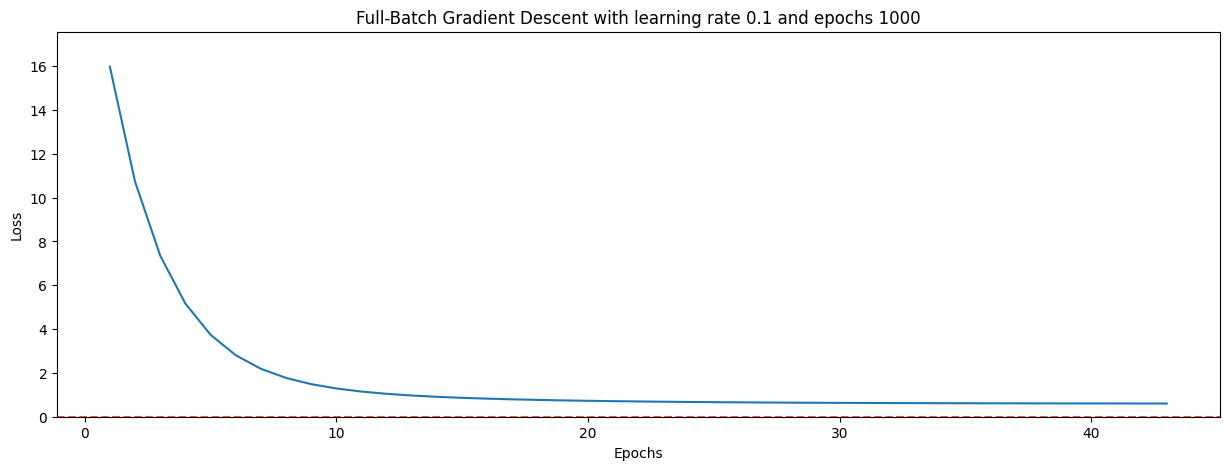

Full-Batch Gradient Descent Converged at step 43 and epoch 43
Final Theta_0 is 3.9331978374727834 and Theta_1 is 2.5407641948010076 at Epoch 43

Running Full-Batch Gradient Descent with learning rate: 0.01


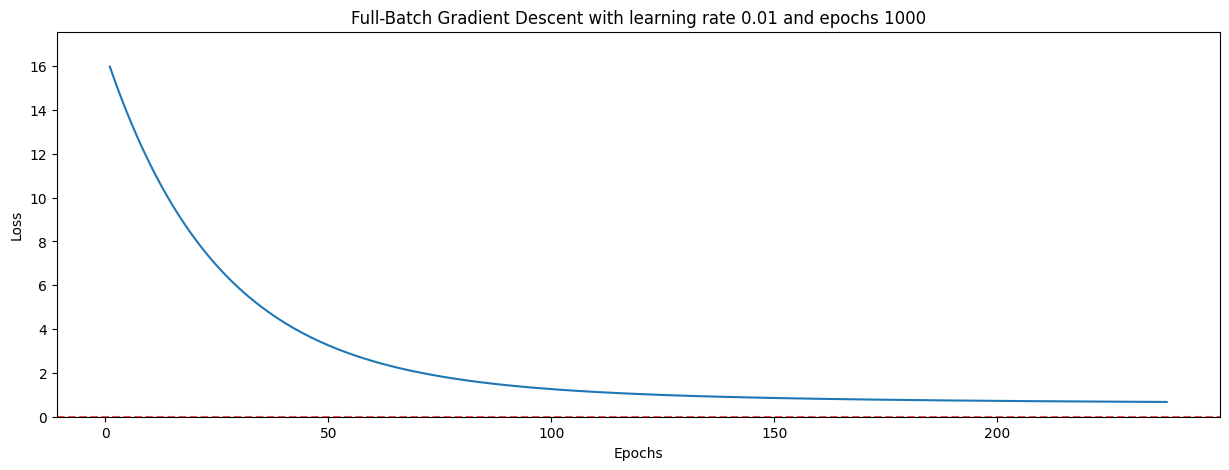

Full-Batch Gradient Descent Converged at step 238 and epoch 238
Final Theta_0 is 3.8615843231903133 and Theta_1 is 2.1900727441245444 at Epoch 238

Running Full-Batch Gradient Descent with learning rate: 0.001


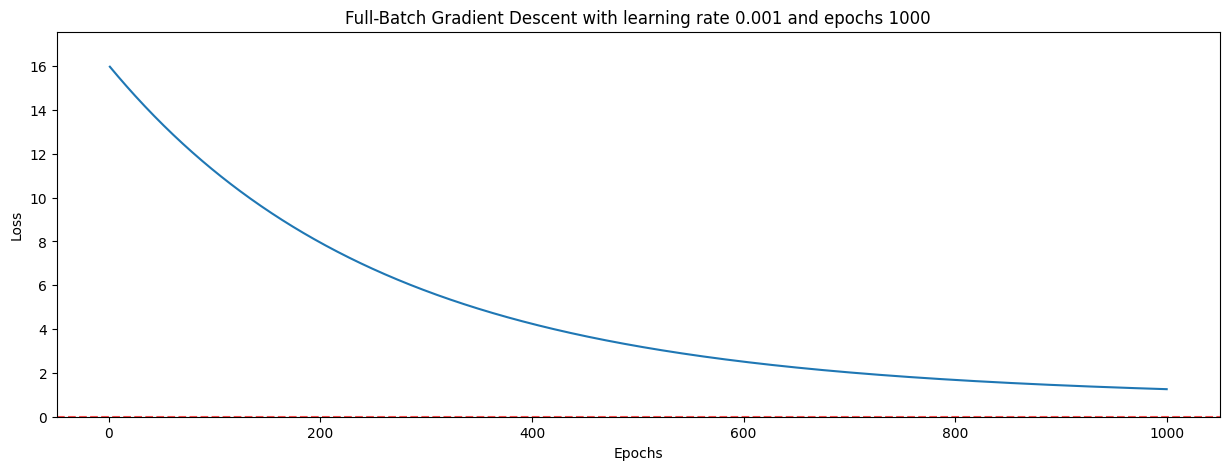

Full-Batch Gradient Descent Converged at step 1000 and epoch 1000
Final Theta_0 is 3.3213115146101235 and Theta_1 is 1.5847064120115988 at Epoch 1000

Running Mini-Batch Gradient Descent with learning rate: 0.1


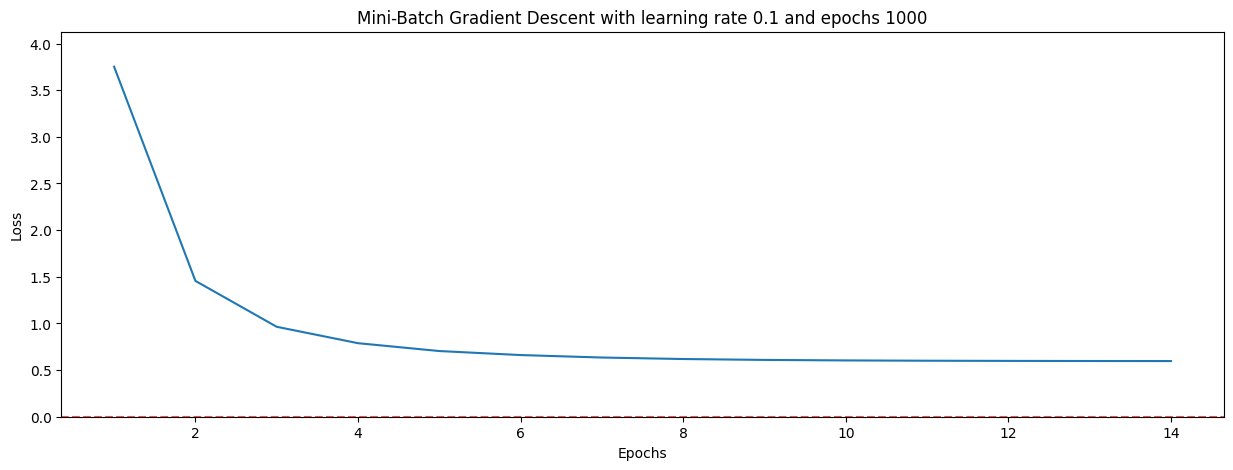

Mini-Batch Gradient Descent Converged at step 56 and epoch 14
Final Theta_0 is 3.95816371765977 and Theta_1 is 2.6352375596542 at Epoch 14

Running Mini-Batch Gradient Descent with learning rate: 0.01


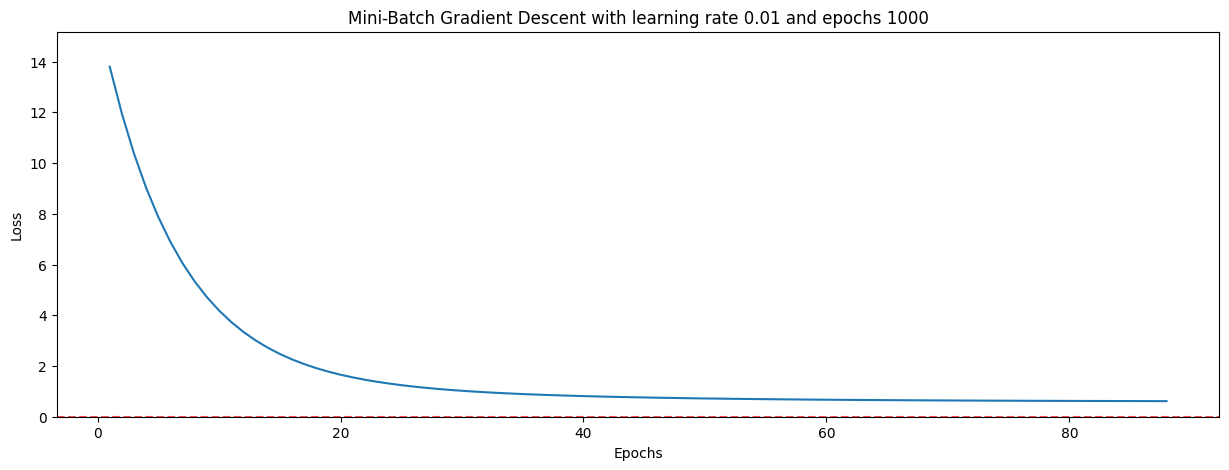

Mini-Batch Gradient Descent Converged at step 352 and epoch 88
Final Theta_0 is 3.918357407309644 and Theta_1 is 2.437218647239904 at Epoch 88

Running Mini-Batch Gradient Descent with learning rate: 0.001


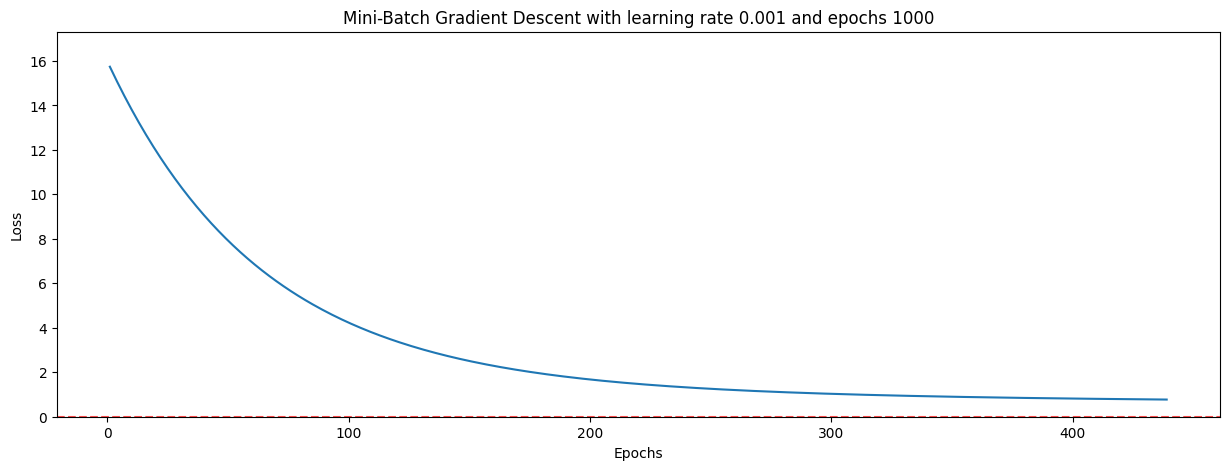

Mini-Batch Gradient Descent Converged at step 1756 and epoch 439
Final Theta_0 is 3.75599592789057 and Theta_1 is 1.9663895120057535 at Epoch 439

Running Stochastic Gradient Descent with learning rate: 0.1


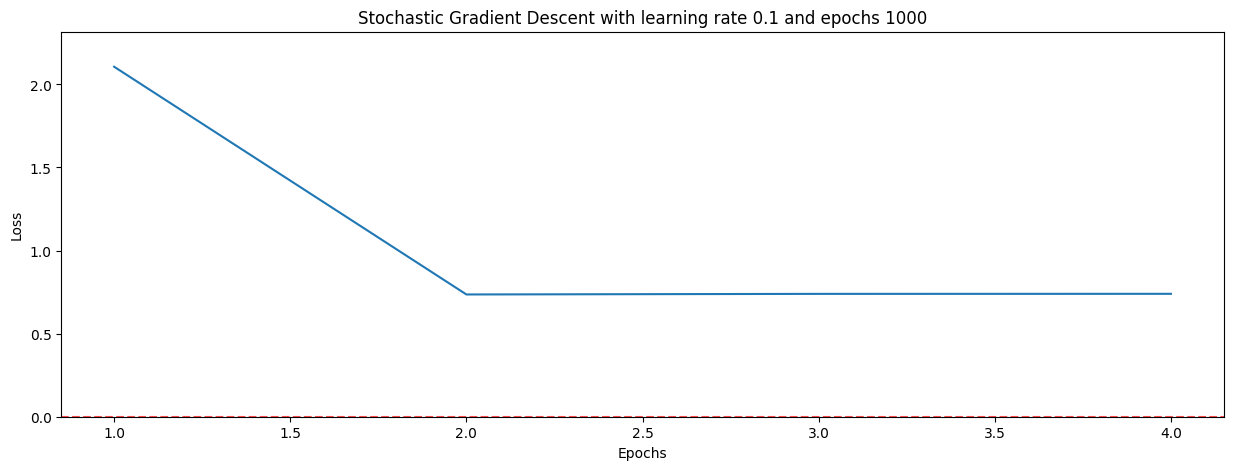

Stochastic Gradient Descent Converged at step 160 and epoch 4
Final Theta_0 is 4.333837387725553 and Theta_1 is 2.7331028618036606 at Epoch 4

Running Stochastic Gradient Descent with learning rate: 0.01


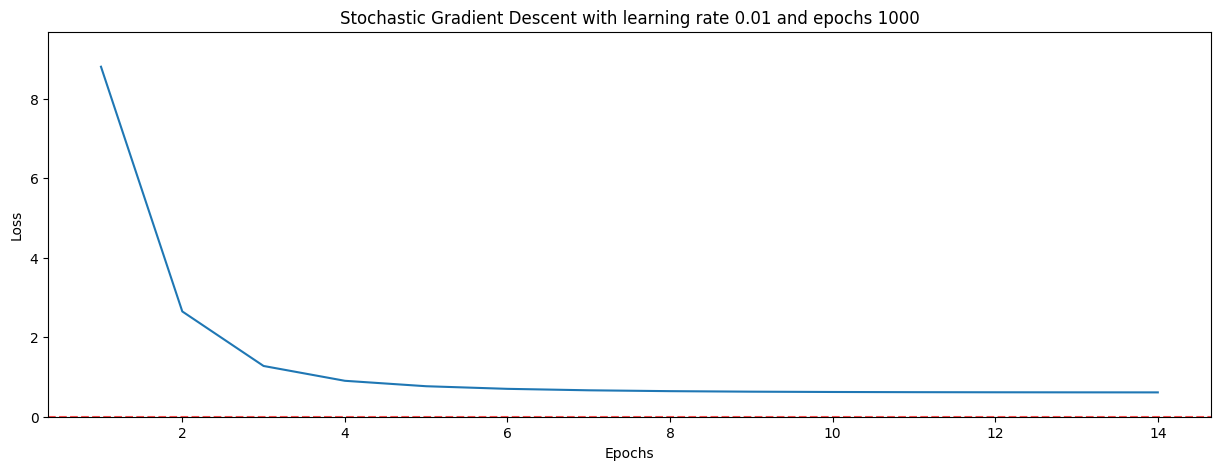

Stochastic Gradient Descent Converged at step 560 and epoch 14
Final Theta_0 is 3.9729567301167616 and Theta_1 is 2.624109222413898 at Epoch 14

Running Stochastic Gradient Descent with learning rate: 0.001


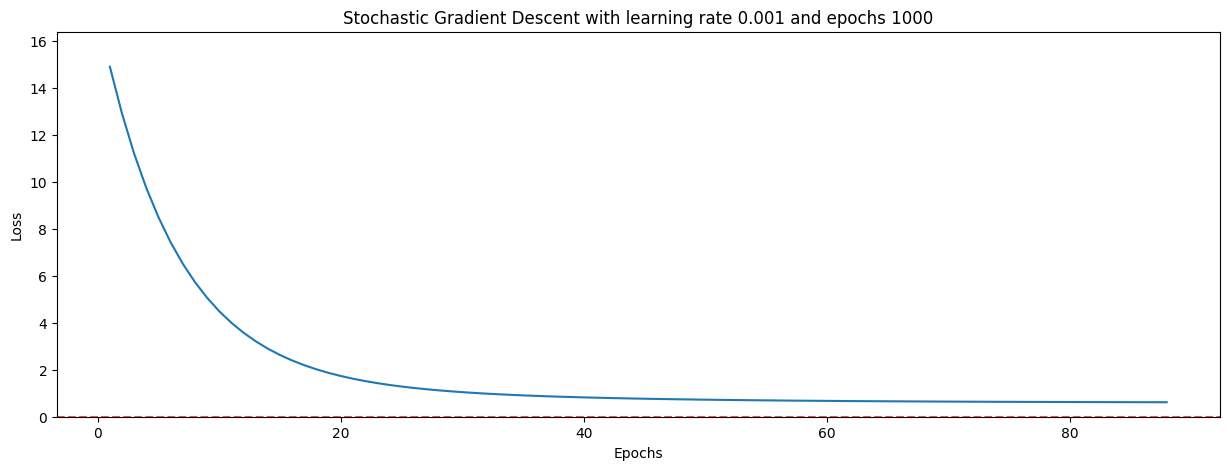

Stochastic Gradient Descent Converged at step 3520 and epoch 88
Final Theta_0 is 3.9200037504780707 and Theta_1 is 2.436560690115615 at Epoch 88

Average number of iterations for Full-Batch Gradient Descent with learning rate 0.1: 43.0
Average number of iterations for Full-Batch Gradient Descent with learning rate 0.01: 238.0
Average number of iterations for Full-Batch Gradient Descent with learning rate 0.001: 1000.0
Average number of iterations for Mini-Batch Gradient Descent with learning rate 0.1: 53.6
Average number of iterations for Mini-Batch Gradient Descent with learning rate 0.01: 349.6
Average number of iterations for Mini-Batch Gradient Descent with learning rate 0.001: 1756.0
Average number of iterations for Stochastic Gradient Descent with learning rate 0.1: 160.0
Average number of iterations for Stochastic Gradient Descent with learning rate 0.01: 560.0
Average number of iterations for Stochastic Gradient Descent with learning rate 0.001: 3520.0


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Compute optimal theta using the Normal Equation
def compute_optimal_theta(x1, y):
    X = np.vstack((np.ones(len(x1)), x1)).T
    theta_optimal = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta_optimal[0], theta_optimal[1]

# Linear regression model
def compute_loss(y, y_hat):
    return np.sum((y - y_hat) ** 2) / len(y)

# Full-Batch Gradient Descent
def full_batch_gradient_descent(epochs, learning_rate, theta_0, theta_1, x1, y, epsilon=0.001):
    prev_loss = float('inf')
    loss = []
    for i in range(epochs):
        y_hat = theta_0 + theta_1 * x1
        curr_loss = compute_loss(y, y_hat)
        
        grad_theta_0 = -2 * np.sum(y - y_hat) / len(x1)
        grad_theta_1 = -2 * np.sum((y - y_hat) * x1) / len(x1)
        
        theta_0 -= learning_rate * grad_theta_0
        theta_1 -= learning_rate * grad_theta_1
        
        loss.append(curr_loss)
        if abs(prev_loss - curr_loss) < epsilon:
            return loss, i + 1, theta_0, theta_1, i + 1
        
        prev_loss = curr_loss

    return loss, epochs, theta_0, theta_1, epochs

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(epochs, batch_size, learning_rate, theta_0, theta_1, x1, y, epsilon=0.001):
    prev_loss = float('inf')
    loss = []
    num_samples = len(x1)
    
    for epoch in range(epochs):
        indices = np.random.permutation(num_samples)
        for i in range(0, num_samples, batch_size):
            batch_indices = indices[i:i + batch_size]
            x1_batch = x1[batch_indices]
            y_batch = y[batch_indices]

            y_hat = theta_0 + theta_1 * x1_batch
            curr_loss = compute_loss(y_batch, y_hat)
            
            grad_theta_0 = -2 * np.sum(y_batch - y_hat) / len(x1_batch)
            grad_theta_1 = -2 * np.sum((y_batch - y_hat) * x1_batch) / len(x1_batch)
            
            theta_0 -= learning_rate * grad_theta_0
            theta_1 -= learning_rate * grad_theta_1

        # Compute and track loss for the entire dataset at the end of the epoch
        y_hat_full = theta_0 + theta_1 * x1
        curr_loss = compute_loss(y, y_hat_full)
        loss.append(curr_loss)

        if abs(prev_loss - curr_loss) < epsilon:
            return loss, (epoch + 1) * (num_samples // batch_size), theta_0, theta_1, epoch + 1
        
        prev_loss = curr_loss

    return loss, epochs * (num_samples // batch_size), theta_0, theta_1, epochs

# Stochastic Gradient Descent
def stochastic_gradient_descent(epochs, learning_rate, theta_0, theta_1, x1, y, epsilon=0.001):
    prev_loss = float('inf')
    loss = []
    num_samples = len(x1)
    
    for i in range(epochs):
        total_loss = 0
        for j in range(num_samples):
            y_hat = theta_0 + theta_1 * x1[j]
            curr_loss = (y[j] - y_hat) ** 2
            
            grad_theta_0 = -2 * (y[j] - y_hat)
            grad_theta_1 = -2 * (y[j] - y_hat) * x1[j]
            
            theta_0 -= learning_rate * grad_theta_0
            theta_1 -= learning_rate * grad_theta_1
            
            total_loss += curr_loss
        
        avg_loss = total_loss / num_samples
        loss.append(avg_loss)
        if abs(prev_loss - avg_loss) < epsilon:
            return loss, (i + 1) * num_samples, theta_0, theta_1, i + 1
        
        prev_loss = avg_loss

    return loss, epochs * num_samples, theta_0, theta_1, epochs

# Visualization functions
def visualize_loss(loss, learning_rate, optimizer, epochs, ylim):
    plt.figure(figsize=(15, 5))
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{optimizer} with learning rate {learning_rate} and epochs {epochs}')
    plt.ylim(ylim)
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    plt.show()

# Calculate average number of iterations for convergence
def calculate_average_iterations(method, learning_rates, epochs, batch_size, epsilon, num_trials):
    avg_iterations = []
    for lr in learning_rates:
        total_iterations = 0
        for _ in range(num_trials):
            theta_0, theta_1 = 0, 1
            if method == 'Full-Batch':
                _, iterations, _, _, _ = full_batch_gradient_descent(epochs, lr, theta_0, theta_1, x1, y, epsilon)
            elif method == 'Mini-Batch':
                _, iterations, _, _, _ = mini_batch_gradient_descent(epochs, batch_size, lr, theta_0, theta_1, x1, y, epsilon)
            elif method == 'Stochastic':
                _, iterations, _, _, _ = stochastic_gradient_descent(epochs, lr, theta_0, theta_1, x1, y, epsilon)
            total_iterations += iterations
        
        avg_iterations.append(total_iterations / num_trials)
        print(f'Average number of iterations for {method} Gradient Descent with learning rate {lr}: {avg_iterations[-1]}')

# Define parameters
learning_rates = [0.1, 0.01, 0.001]
epochs = 1000
batch_size = 10
epsilon = 0.001
num_trials = 10

# Run and report results for each method
for lr in learning_rates:
    print(f'Running Full-Batch Gradient Descent with learning rate: {lr}')
    loss, iterations, theta_0, theta_1, converged_epoch = full_batch_gradient_descent(epochs, lr, 0, 1, x1, y)
    visualize_loss(loss, lr, 'Full-Batch Gradient Descent', epochs, [0, max(loss) * 1.1])
    print(f'Full-Batch Gradient Descent Converged at step {iterations} and epoch {converged_epoch}')
    print(f'Final Theta_0 is {theta_0} and Theta_1 is {theta_1} at Epoch {converged_epoch}\n')

for lr in learning_rates:
    print(f'Running Mini-Batch Gradient Descent with learning rate: {lr}')
    loss, iterations, theta_0, theta_1, converged_epoch = mini_batch_gradient_descent(epochs, batch_size, lr, 0, 1, x1, y)
    visualize_loss(loss, lr, 'Mini-Batch Gradient Descent', epochs, [0, max(loss) * 1.1])
    print(f'Mini-Batch Gradient Descent Converged at step {iterations} and epoch {converged_epoch}')
    print(f'Final Theta_0 is {theta_0} and Theta_1 is {theta_1} at Epoch {converged_epoch}\n')

for lr in learning_rates:
    print(f'Running Stochastic Gradient Descent with learning rate: {lr}')
    loss, iterations, theta_0, theta_1, converged_epoch = stochastic_gradient_descent(epochs, lr, 0, 1, x1, y)
    visualize_loss(loss, lr, 'Stochastic Gradient Descent', epochs, [0, max(loss) * 1.1])
    print(f'Stochastic Gradient Descent Converged at step {iterations} and epoch {converged_epoch}')
    print(f'Final Theta_0 is {theta_0} and Theta_1 is {theta_1} at Epoch {converged_epoch}\n')

# Calculate average iterations for each method
calculate_average_iterations('Full-Batch', learning_rates, epochs, batch_size, epsilon, num_trials)
calculate_average_iterations('Mini-Batch', learning_rates, epochs, batch_size, epsilon, num_trials)
calculate_average_iterations('Stochastic', learning_rates, epochs, batch_size, epsilon, num_trials)


Generating contour plots for Full-Batch Gradient Descent with learning rate: 0.1


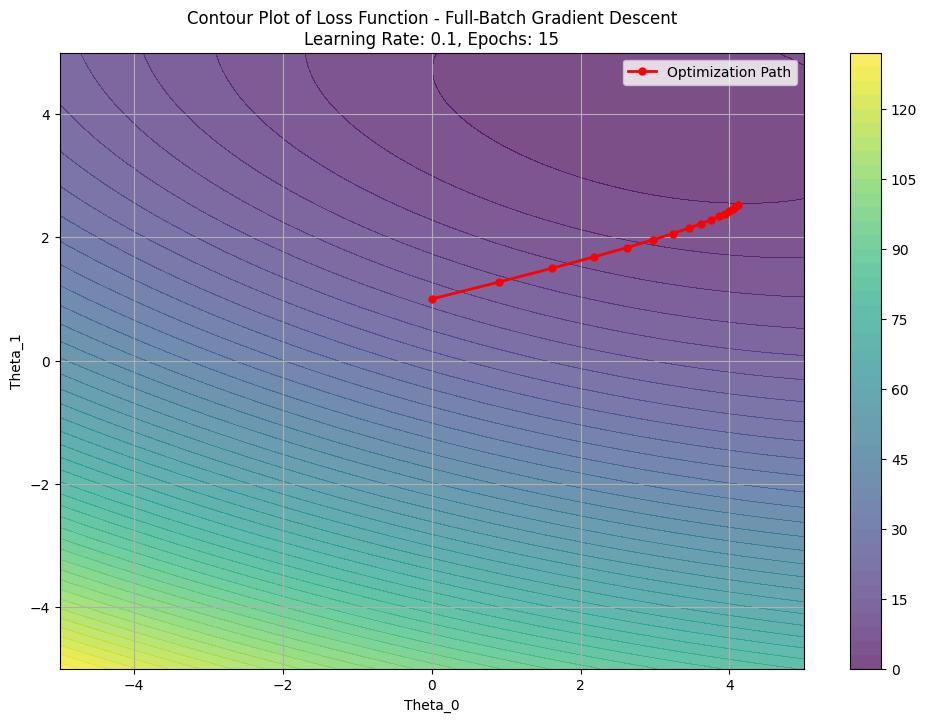

Generating contour plots for Mini-Batch Gradient Descent with learning rate: 0.1


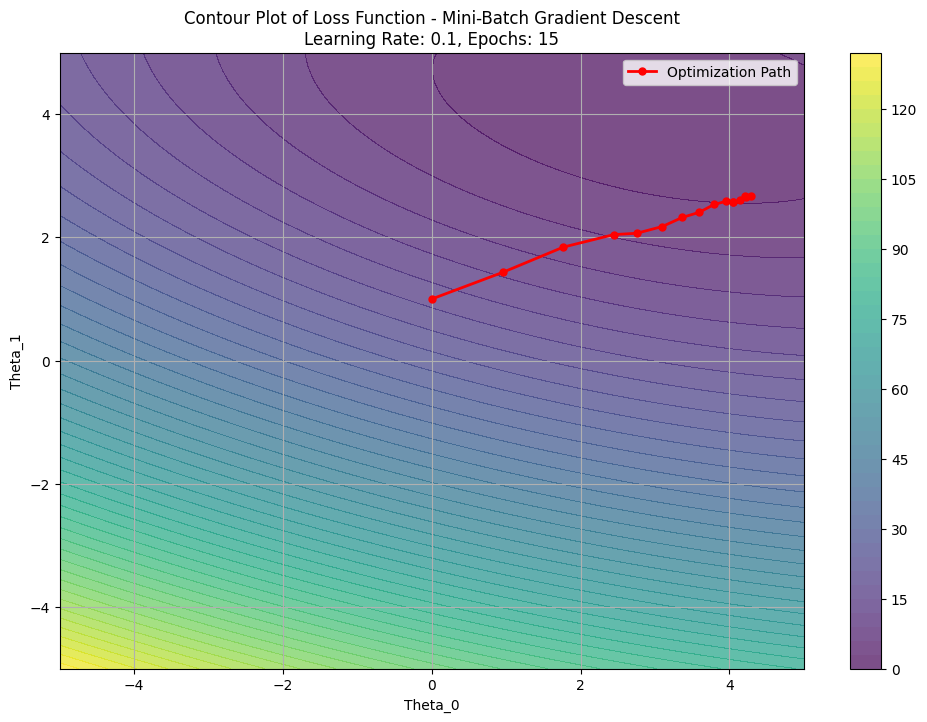

Generating contour plots for Stochastic Gradient Descent with learning rate: 0.1


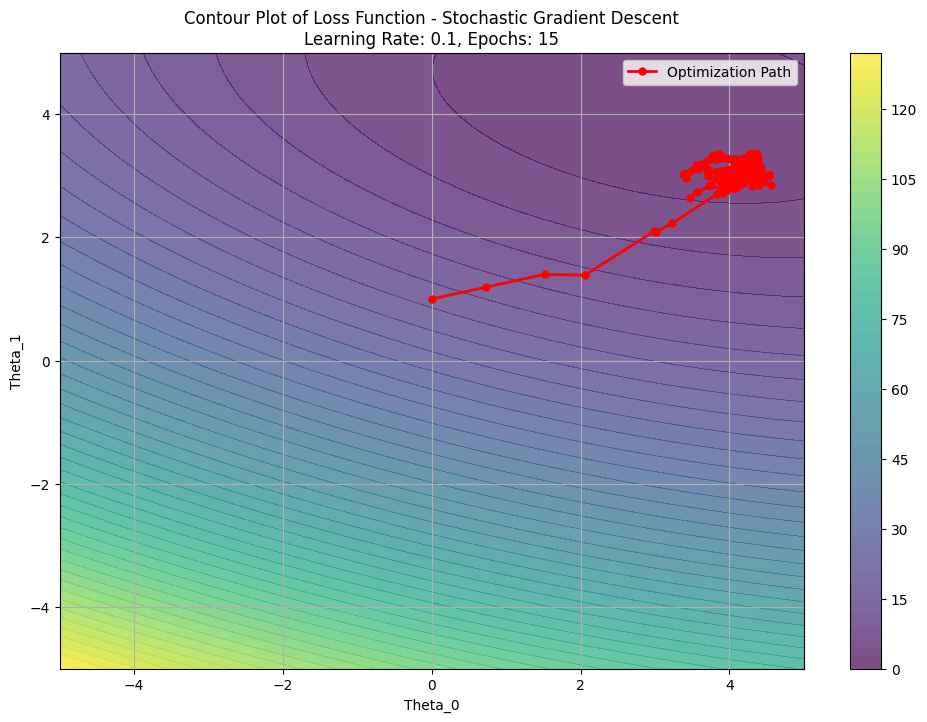

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute loss grid
def compute_grid_loss(x1, y, theta_0_range, theta_1_range, learning_rate, method, epochs, batch_size=None):
    theta_0_vals = np.linspace(theta_0_range[0], theta_0_range[1], 100)
    theta_1_vals = np.linspace(theta_1_range[0], theta_1_range[1], 100)
    Theta_0, Theta_1 = np.meshgrid(theta_0_vals, theta_1_vals)
    loss = np.zeros(Theta_0.shape)
    
    for i in range(Theta_0.shape[0]):
        for j in range(Theta_0.shape[1]):
            theta_0 = Theta_0[i, j]
            theta_1 = Theta_1[i, j]
            y_hat = theta_0 + theta_1 * x1
            error = y_hat - y
            loss[i, j] = np.mean(error ** 2)
    
    return Theta_0, Theta_1, loss

# Gradient Descent with Path Tracking
def gradient_descent_with_path(epochs, learning_rate, theta_0_init, theta_1_init, x1, y, epsilon, method, batch_size=None):
    theta_0 = theta_0_init
    theta_1 = theta_1_init
    path = [(theta_0, theta_1)]
    m = len(x1)
    
    for epoch in range(epochs):
        if method == 'Full-Batch':
            y_hat = theta_0 + theta_1 * x1
            error = y_hat - y
            gradient_theta_0 = (2/m) * np.sum(error)
            gradient_theta_1 = (2/m) * np.sum(error * x1)
        elif method == 'Mini-Batch':
            indices = np.random.choice(m, batch_size)
            x_batch = x1[indices]
            y_batch = y[indices]
            y_hat = theta_0 + theta_1 * x_batch
            error = y_hat - y_batch
            gradient_theta_0 = (2/batch_size) * np.sum(error)
            gradient_theta_1 = (2/batch_size) * np.sum(error * x_batch)
        elif method == 'Stochastic':
            for i in range(m):
                xi = x1[i]
                yi = y[i]
                y_hat = theta_0 + theta_1 * xi
                error = y_hat - yi
                gradient_theta_0 = 2 * error
                gradient_theta_1 = 2 * error * xi
                theta_0 -= learning_rate * gradient_theta_0
                theta_1 -= learning_rate * gradient_theta_1
                path.append((theta_0, theta_1))
            continue
        
        theta_0 -= learning_rate * gradient_theta_0
        theta_1 -= learning_rate * gradient_theta_1
        path.append((theta_0, theta_1))
        
        # Check for convergence
        if np.sqrt(gradient_theta_0**2 + gradient_theta_1**2) < epsilon:
            break
    
    return theta_0, theta_1, path

# Function to plot contour with optimization path
def plot_contour_with_path(theta_0_range, theta_1_range, loss, path, method, learning_rate, epochs):
    Theta_0, Theta_1 = np.meshgrid(np.linspace(theta_0_range[0], theta_0_range[1], loss.shape[0]), 
                                   np.linspace(theta_1_range[0], theta_1_range[1], loss.shape[1]))
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(Theta_0, Theta_1, loss.T, 50, cmap='viridis', alpha=0.7)
    plt.colorbar(contour)
    
    # Convert path to numpy array if necessary
    path = np.array(path)
    if len(path) > 0:
        plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=5, linewidth=2, label='Optimization Path')
    
    plt.xlabel('Theta_0')
    plt.ylabel('Theta_1')
    plt.title(f'Contour Plot of Loss Function - {method} Gradient Descent\nLearning Rate: {learning_rate}, Epochs: {epochs}')
    plt.xlim(theta_0_range)
    plt.ylim(theta_1_range)
    plt.grid(True)
    plt.legend()
    plt.show()

# Parameters
theta_0_range = (-5, 5)
theta_1_range = (-5, 5)
learning_rate = 0.1
epochs = 15
epsilon = 0.001
batch_size = 10
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Run gradient descent and plot
print(f'Generating contour plots for Full-Batch Gradient Descent with learning rate: {learning_rate}')
_, _, path = gradient_descent_with_path(epochs, learning_rate, 0, 1, x1, y, epsilon, 'Full-Batch')
_, _, loss = compute_grid_loss(x1, y, theta_0_range, theta_1_range, learning_rate, 'Full-Batch', epochs)
plot_contour_with_path(theta_0_range, theta_1_range, loss, path, 'Full-Batch', learning_rate, epochs)

print(f'Generating contour plots for Mini-Batch Gradient Descent with learning rate: {learning_rate}')
_, _, path = gradient_descent_with_path(epochs, learning_rate, 0, 1, x1, y, epsilon, 'Mini-Batch', batch_size)
_, _, loss = compute_grid_loss(x1, y, theta_0_range, theta_1_range, learning_rate, 'Mini-Batch', epochs, batch_size)
plot_contour_with_path(theta_0_range, theta_1_range, loss, path, 'Mini-Batch', learning_rate, epochs)

print(f'Generating contour plots for Stochastic Gradient Descent with learning rate: {learning_rate}')
_, _, path = gradient_descent_with_path(epochs, learning_rate, 0, 1, x1, y, epsilon, 'Stochastic')
_, _, loss = compute_grid_loss(x1, y, theta_0_range, theta_1_range, learning_rate, 'Stochastic', epochs)
plot_contour_with_path(theta_0_range, theta_1_range, loss, path, 'Stochastic', learning_rate, epochs)


Gradient Descent with Momentum updates the parameters using the formula:

𝑣
𝑡
+
1
=
𝛽
𝑣
𝑡
+
(
1
−
𝛽
)
∇
Loss
v 
t+1
​
 =βv 
t
​
 +(1−β)∇Loss 
𝜃
𝑡
+
1
=
𝜃
𝑡
−
𝜂
𝑣
𝑡
+
1
θ 
t+1
​
 =θ 
t
​
 −ηv 
t+1
​


Theta_0 is 3.880260467529297 and Theta_1 is 2.1753854751586914 at epoch 296
Theta_0 is 3.993386745452881 and Theta_1 is 2.8401832580566406 at epoch 61
Theta_0 is 3.880260467529297 and Theta_1 is 2.1753854751586914 at epoch 296
Theta_0 is 3.993386745452881 and Theta_1 is 2.8401832580566406 at epoch 61
Theta_0 is 3.880260467529297 and Theta_1 is 2.1753854751586914 at epoch 296
Theta_0 is 3.993386745452881 and Theta_1 is 2.8401832580566406 at epoch 61
Theta_0 is 3.880260467529297 and Theta_1 is 2.1753854751586914 at epoch 296
Theta_0 is 3.993386745452881 and Theta_1 is 2.8401832580566406 at epoch 61
Theta_0 is 3.880260467529297 and Theta_1 is 2.1753854751586914 at epoch 296
Theta_0 is 3.993386745452881 and Theta_1 is 2.8401832580566406 at epoch 61
Theta_0 is 3.880260467529297 and Theta_1 is 2.1753854751586914 at epoch 296
Theta_0 is 3.993386745452881 and Theta_1 is 2.8401832580566406 at epoch 61
Theta_0 is 3.880260467529297 and Theta_1 is 2.1753854751586914 at epoch 296
Theta_0 is 3.99338

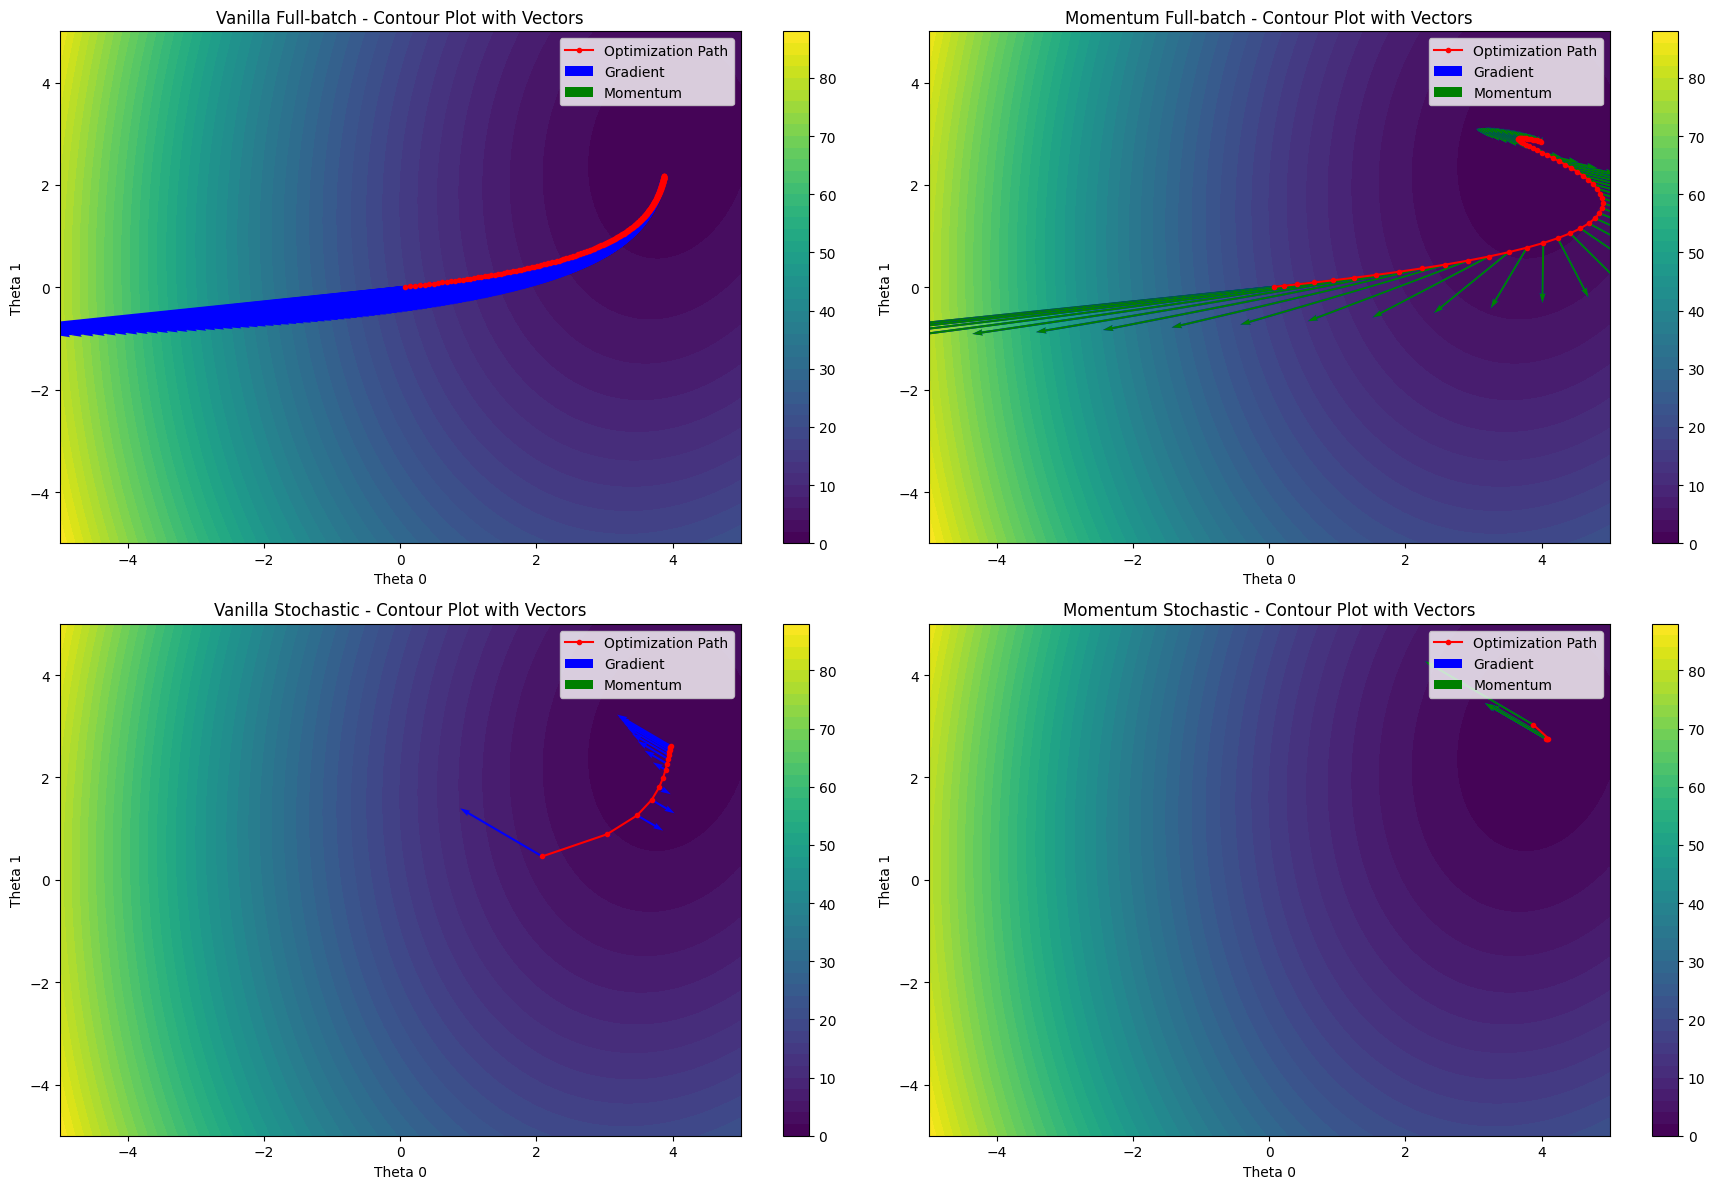

In [72]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(45)
num_samples = 40
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3 * x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

# Convert the data to PyTorch tensors
x1_tensor = torch.tensor(x1, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Model parameters
learning_rate = 0.01
momentum = 0.9
epsilon = 0.001
epochs = 1000  # Max epochs for each trial
batch_size = 5  # Mini-batch size

# Define the linear model
def linear_model(x, theta_0, theta_1):
    return theta_1 * x + theta_0

# Compute the mean squared error (MSE) loss
def mse_loss(y_hat, y):
    return torch.mean((y_hat - y) ** 2)

# Gradient Descent Methods with and without Momentum
def gradient_descent(method, momentum=None):
    losses = []
    diffs = []
    theta_0 = torch.tensor([0.0], requires_grad=True, device=device)
    theta_1 = torch.tensor([0.0], requires_grad=True, device=device)
    theta_0_values = []
    theta_1_values = []
    gradients = []
    momenta = []
    
    if momentum:
        optimizer = torch.optim.SGD([theta_0, theta_1], lr=learning_rate, momentum=momentum)
    else:
        optimizer = torch.optim.SGD([theta_0, theta_1], lr=learning_rate)
    
    prev_loss = float('inf')

    for epoch in range(epochs):
        optimizer.zero_grad()
        
        if method == 'full-batch':
            y_hat = linear_model(x1_tensor, theta_0, theta_1)
            loss = mse_loss(y_hat, y_tensor)
            loss.backward()
            optimizer.step()
        
        elif method == 'stochastic':
            for i in range(num_samples):
                x_i = x1_tensor[i:i+1]
                y_i = y_tensor[i:i+1]
                
                optimizer.zero_grad()
                y_hat = linear_model(x_i, theta_0, theta_1)
                loss = mse_loss(y_hat, y_i)
                loss.backward()
                optimizer.step()

        curr_loss = mse_loss(linear_model(x1_tensor, theta_0, theta_1), y_tensor).item()
        losses.append(curr_loss)
        diffs.append(abs(prev_loss - curr_loss))
        
        theta_0_values.append(theta_0.item())
        theta_1_values.append(theta_1.item())
        gradients.append([theta_0.grad.item(), theta_1.grad.item()])

        if momentum:
            momenta.append([p.grad.item() if p.grad is not None else 0 for p in optimizer.param_groups[0]['params']])
        else:
            momenta.append([0, 0])

        if abs(prev_loss - curr_loss) < epsilon:
            # print(f'Gradient Descent Converged at Epoch {epoch+1}')
            break

        prev_loss = curr_loss

    print(f'Theta_0 is {theta_0.item()} and Theta_1 is {theta_1.item()} at epoch {epoch+1}')
    return theta_0_values, theta_1_values, gradients, momenta, epoch + 1

# Choose device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data to device
x1_tensor = x1_tensor.to(device)
y_tensor = y_tensor.to(device)

# Run Gradient Descent for each method and with/without momentum
methods = ['full-batch', 'stochastic']
trials = 10
results = {'vanilla': {'full-batch': [], 'stochastic': []}, 'momentum': {'full-batch': [], 'stochastic': []}}

for method in methods:
    for _ in range(trials):
        # print(f"\nRunning Vanilla {method.capitalize()} Gradient Descent Trial...")
        _, _, _, _, steps_vanilla = gradient_descent(method)
        results['vanilla'][method].append(steps_vanilla)

        # print(f"\nRunning Gradient Descent with Momentum for {method.capitalize()} Trial...")
        _, _, _, _, steps_momentum = gradient_descent(method, momentum=momentum)
        results['momentum'][method].append(steps_momentum)

# Calculate and print average number of steps to converge
print("\nAverage Number of Steps Taken to Converge:")
print(f"{'Method':<20}{'Vanilla':<10}{'Momentum':<10}")
for method in methods:
    avg_vanilla = np.mean(results['vanilla'][method])
    avg_momentum = np.mean(results['momentum'][method])
    print(f"{method.capitalize():<20}{avg_vanilla:<10.2f}{avg_momentum:<10.2f}")

# Plot contour plots with vectors
def plot_contour_with_vectors(ax, theta_0_values, theta_1_values, gradients, momenta, method):
    theta_0_range = np.linspace(-5, 5, 100)
    theta_1_range = np.linspace(-5, 5, 100)
    theta_0_grid, theta_1_grid = np.meshgrid(theta_0_range, theta_1_range)
    loss_grid = np.zeros_like(theta_0_grid)
    
    for i in range(len(theta_0_range)):
        for j in range(len(theta_1_range)):
            theta_0_torch = torch.tensor([theta_0_grid[i, j]], dtype=torch.float32, device=device, requires_grad=False)
            theta_1_torch = torch.tensor([theta_1_grid[i, j]], dtype=torch.float32, device=device, requires_grad=False)
            y_hat = linear_model(x1_tensor, theta_0_torch, theta_1_torch)
            loss = mse_loss(y_hat, y_tensor).item()
            loss_grid[i, j] = loss
    
    contour = ax.contourf(theta_0_grid, theta_1_grid, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(contour, ax=ax)
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.set_title(f'{method} - Contour Plot with Vectors')

    # Plot the optimization path
    ax.plot(theta_0_values, theta_1_values, 'r-o', markersize=3, label='Optimization Path')

    # Plot gradient and momentum vectors
    for i in range(len(gradients)):
        grad = gradients[i]
        mom = momenta[i] if len(momenta) > i else (0, 0)  # Default to (0, 0) if no momentum
        ax.quiver(theta_0_values[i], theta_1_values[i], grad[0], grad[1], color='blue', angles='xy', scale_units='xy', scale=1, label='Gradient' if i == 0 else "", width=0.003)
        ax.quiver(theta_0_values[i], theta_1_values[i], mom[0], mom[1], color='green', angles='xy', scale_units='xy', scale=1, label='Momentum' if i == 0 else "", width=0.003)

    ax.legend()

# Prepare the plot for contour plots with vectors
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
for idx, method in enumerate(methods):
    # Vanilla Gradient Descent
    ax = axs[idx, 0]
    theta_0_values, theta_1_values, gradients, momenta, _ = gradient_descent(method)
    plot_contour_with_vectors(ax, theta_0_values, theta_1_values, gradients, momenta, f'Vanilla {method.capitalize()}')

    # Gradient Descent with Momentum
    ax = axs[idx, 1]
    theta_0_values, theta_1_values, gradients, momenta, _ = gradient_descent(method, momentum=momentum)
    plot_contour_with_vectors(ax, theta_0_values, theta_1_values, gradients, momenta, f'Momentum {method.capitalize()}')

plt.tight_layout()
plt.show()
